<a href="https://colab.research.google.com/github/pedrohortencio/data-analysis-projects/blob/main/World%20Happiness%20Report/The_World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre os Dados

![](https://olatorera.com/wp-content/uploads/2020/03/world-happiness-report.png)

Para exemplificar o uso do _pandas_ e suas funções, iremos utilizar os dados do relatório de felicidade global, feito com base em várias fontes e usado por alguns governos como guia de ações públicas.

Serão duas tabelas (que vão ser convertidas em dataframe):

* O relatório de 2021, com ranking.
* O relatório com dados da série história, em alguns países com os indicadores de 2005 a 2020.

Os dados podem ser obtidos de várias fontes confiáveis:

* [Kaggle](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report.csv)
* Do próprio site do [World Happiness Report](https://worldhappiness.report/ed/2021/#appendices-and-data), onde também é possível ler o relatório em formato PDF.

# Importando Bibliotecas

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Baixando os Dados

In [8]:
# O pandas é muito flexível. É possível criar dataframes inserindo apenas a URL do arquivo, sem a necessidade de baixar localmente.
df_2021 = pd.read_excel("https://happiness-report.s3.amazonaws.com/2021/DataForFigure2.1WHR2021C2.xls")
df_hist = pd.read_excel("https://happiness-report.s3.amazonaws.com/2021/DataPanelWHR2021C2.xls")

# EDA

> Por hora, vamos focar no relatório de 2021.

In [ ]:
# A primeira coisa a se fazer é checar o DataFrame para verificar:
    # 1) Se a criação foi feita com sucesso. Se não, é necessário voltar ao comando pd.read_excel() e alterar os parâmetros
    # 2) Como os dados estão organizados

In [9]:
# vamos, simplesmente, imprimir as 5 primeiras linhas
df_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,2.430343,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524,3.253415
1,Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,2.430343,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993,2.868296
2,Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,2.430343,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019,2.839148
3,Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,2.430343,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940,2.966945
4,Netherlands,Western Europe,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818


> Nota-se que os dados estão ordenados com base nos valores da coluna _Ladder score_.

Vamos checar os últimos valores do DataFrame:

In [10]:
df_2021.tail()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
144,Lesotho,Sub-Saharan Africa,3.5118,0.120454,3.747890,3.275710,7.925777,0.786871,48.700001,0.714954,-0.130536,0.915377,2.430343,0.450848,0.730561,0.006992,0.405455,0.102819,0.015284,1.799821
145,Botswana,Sub-Saharan Africa,3.4665,0.073872,3.611289,3.321711,9.781536,0.784171,59.269188,0.824394,-0.246159,0.800619,2.430343,1.099198,0.724478,0.339868,0.538626,0.027394,0.088468,0.648460
146,Rwanda,Sub-Saharan Africa,3.4147,0.067830,3.547647,3.281753,7.676118,0.552339,61.399727,0.896758,0.060526,0.166801,2.430343,0.363624,0.202183,0.406969,0.626681,0.227457,0.492669,1.095149
147,Zimbabwe,Sub-Saharan Africa,3.1448,0.058443,3.259349,3.030251,7.942595,0.750470,56.200840,0.676700,-0.047346,0.820999,2.430343,0.456724,0.648552,0.243230,0.358907,0.157088,0.075471,1.204845
148,Afghanistan,South Asia,2.5229,0.037535,2.596468,2.449332,7.694710,0.462596,52.492615,0.381749,-0.101684,0.924338,2.430343,0.370120,0.000000,0.126440,0.000000,0.121641,0.009569,1.895141


In [18]:
# Vamos ver o tamanho do dataset
df_2021.shape

(149, 20)

### Investigando as Colunas

> Sempre é uma boa ideia verificar as colunas e entender qual o dado de cada uma:

In [14]:
# Podemos fazer isso assim:
df_2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [13]:
# Mas um jeito melhor é:
df_2021.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

Hora de consultar a documentação para entender alguns pontos-chave:

* Ladder score: _"[...] This is called the Cantril ladder: it asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale."_

* Dystopia: _a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors (levels of GDP, life expectancy, generosity, social support, freedom, and corruption)_

* Colunas com "Explained by": são valores corrigidos, pois continham _missing values_, especialmente nas colunas relacionadas a dados de corrupção. A explicação oficial:

_We do not make use of any imputed missing values in our rankings of happiness and
its supporting factors. The only place where we make use of imputation is when
we try to decompose a country’s average ladder score into components explained by
six hypothesized underlying determinants (GDP per person, healthy life expectancy,
social support, perceived freedom to make life choice, generosity and perception of
corruption). A small number of countries have missing values in one or more of these
factors. The most prominent is about the perception of corruption in businesses
and governments. In several countries, the relevant questions were not asked in
the Gallup World Poll. For these countries we impute the missing values using the
“control of corruption” indicator from the Worldwide Governance Indicators (WGI)
project._ [WHR Statistical Appendix 1 - PDF](https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf)

* Residuals: _The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2018-2020 life evaluations. These residuals have an average value of approximately zero over the whole set of countries. The difference between what is attributed to the six factors and the total life evaluations is the sum of two parts. These are the average life evaluations in Dystopia, and each country’s residual._ 


--------------
* Upper whisker and Lower whisker: tem relação com estatística. Ver abaixo.

Todo [boxplot](https://en.wikipedia.org/wiki/Box_plot) (diagrama de caixa) possui retas que se extendem em ambos os lados, chamadas de _whisker_ (ou simplesmente retas ou fios de bigode). Eles indicam a variação fora do quartil superior e do quartil inferior.

_O que é um quartil?_

É simplesmente uma divisão dos dados seguindo uma distribuição estatística. Cada quartil tem, usualmente, 25% dos dados. No caso da distribuição chamada de _bell curve_ (gaussiana/normal), os quartis são os seguintes:

![](https://www.researchgate.net/publication/324532937/figure/fig2/AS:615815585992705@1523833285991/Relationship-of-quartiles-and-inter-quartile-range-Legends-Q-1-first-quartile-Q-3.png)

![](https://www.simplypsychology.org/boxplot.jpg)

_OK. O que os whisker indicam?_

_In summary, if there are no individual data points plotted, the whiskers indicate data’s minimum and maximum. If there are individual data points plotted, the whiskers indicate the largest/lowest points inside the range defined by 1st or 3rd quartile plus 1.5 times IQR (interquartile range)._ [Fonte](https://muse.union.edu/dvorakt/what-drives-the-length-of-whiskers-in-a-box-plot/)

### Melhores 10 Países

In [19]:
df_2021[:10]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,2.430343,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524,3.253415
1,Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,2.430343,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993,2.868296
2,Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,2.430343,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019,2.839148
3,Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,2.430343,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940,2.966945
4,Netherlands,Western Europe,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818
5,Norway,Western Europe,7.3925,0.035449,7.461979,7.323021,11.053126,0.954445,73.300011,0.959588,0.093426,0.270028,2.430343,1.543455,1.108088,0.781768,0.703135,0.248919,0.426839,2.580301
6,Sweden,Western Europe,7.3627,0.035700,7.432671,7.292729,10.866995,0.933805,72.700050,0.944604,0.086223,0.237460,2.430343,1.478426,1.061588,0.762872,0.684902,0.244220,0.447608,2.683093
7,Luxembourg,Western Europe,7.3244,0.036685,7.396303,7.252497,11.646564,0.907790,72.599998,0.907180,-0.033566,0.386419,2.430343,1.750786,1.002978,0.759721,0.639363,0.166077,0.352614,2.652866
8,New Zealand,North America and ANZ,7.2766,0.040186,7.355364,7.197836,10.642713,0.948148,73.400146,0.928580,0.134256,0.241641,2.430343,1.400068,1.093900,0.784921,0.665403,0.275554,0.444942,2.611801
9,Austria,Western Europe,7.2678,0.035523,7.337424,7.198175,10.906316,0.934176,73.299721,0.907691,0.041568,0.481378,2.430343,1.492164,1.062423,0.781758,0.639984,0.215090,0.292056,2.784285


In [27]:
df_2021[:10].groupby("Regional indicator")["Regional indicator"].count()

Regional indicator
North America and ANZ    1
Western Europe           9
Name: Regional indicator, dtype: int64

In [44]:
# O pandas possui várias alternativas para fazer a mesma operação. Uma alternativa para gerar a contagem de valores acima é:

df_2021[:10]["Regional indicator"].value_counts()

Western Europe           9
North America and ANZ    1
Name: Regional indicator, dtype: int64

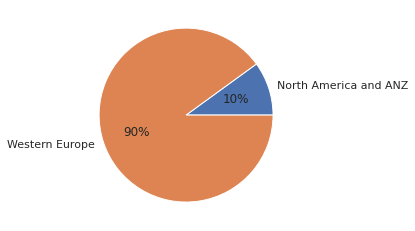

In [41]:
top10 = df_2021[:10].groupby("Regional indicator")["Regional indicator"].count()
ax = top10.plot.pie(autopct='%1.0f%%')
ax.set(xlabel='', ylabel='')
plt.show();

### Piores 10 Países

In [34]:
df_2021[-10:]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
139,Burundi,Sub-Saharan Africa,3.7753,0.107122,3.985260,3.565340,6.635322,0.490326,53.400002,0.626350,-0.023876,0.606935,2.430343,0.000000,0.062473,0.155018,0.297640,0.172398,0.211985,2.875769
140,Yemen,Middle East and North Africa,3.6579,0.069600,3.794316,3.521484,7.578437,0.831537,57.121571,0.602157,-0.146712,0.800288,2.430343,0.329497,0.831189,0.272229,0.268200,0.092267,0.088679,1.775873
141,Tanzania,Sub-Saharan Africa,3.6232,0.070709,3.761789,3.484611,7.875572,0.702071,57.998993,0.833137,0.183150,0.576986,2.430343,0.433308,0.539514,0.299863,0.549264,0.307449,0.231084,1.262726
142,Haiti,Latin America and Caribbean,3.6149,0.172664,3.953322,3.276479,7.477138,0.539504,55.700001,0.593356,0.421520,0.721049,2.430343,0.294107,0.173267,0.227456,0.257491,0.462948,0.139211,2.060448
143,Malawi,Sub-Saharan Africa,3.6000,0.092112,3.780540,3.419460,6.957525,0.536995,57.947525,0.779703,0.038402,0.729065,2.430343,0.112568,0.167614,0.298242,0.484245,0.213025,0.134099,2.190198
144,Lesotho,Sub-Saharan Africa,3.5118,0.120454,3.747890,3.275710,7.925777,0.786871,48.700001,0.714954,-0.130536,0.915377,2.430343,0.450848,0.730561,0.006992,0.405455,0.102819,0.015284,1.799821
145,Botswana,Sub-Saharan Africa,3.4665,0.073872,3.611289,3.321711,9.781536,0.784171,59.269188,0.824394,-0.246159,0.800619,2.430343,1.099198,0.724478,0.339868,0.538626,0.027394,0.088468,0.648460
146,Rwanda,Sub-Saharan Africa,3.4147,0.067830,3.547647,3.281753,7.676118,0.552339,61.399727,0.896758,0.060526,0.166801,2.430343,0.363624,0.202183,0.406969,0.626681,0.227457,0.492669,1.095149
147,Zimbabwe,Sub-Saharan Africa,3.1448,0.058443,3.259349,3.030251,7.942595,0.750470,56.200840,0.676700,-0.047346,0.820999,2.430343,0.456724,0.648552,0.243230,0.358907,0.157088,0.075471,1.204845
148,Afghanistan,South Asia,2.5229,0.037535,2.596468,2.449332,7.694710,0.462596,52.492615,0.381749,-0.101684,0.924338,2.430343,0.370120,0.000000,0.126440,0.000000,0.121641,0.009569,1.895141


In [38]:
df_2021[-10:].groupby("Regional indicator")["Regional indicator"].count()

Regional indicator
Latin America and Caribbean     1
Middle East and North Africa    1
South Asia                      1
Sub-Saharan Africa              7
Name: Regional indicator, dtype: int64

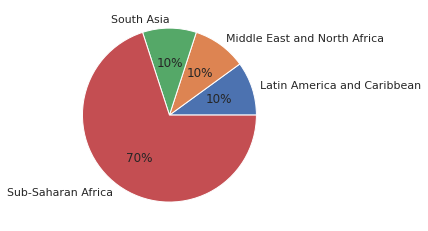

In [40]:
ultimos10 = df_2021[-10:].groupby("Regional indicator")["Regional indicator"].count()
ax = ultimos10.plot.pie(autopct='%1.0f%%')
ax.set(xlabel='', ylabel='')
plt.show();